In this exciting problem set, we'll take walk through another powerful algorithm a non-parametric algorithm called __random forests__. Nonparametric means can be thought of intuitively as being a distribution-free or assumption-free model. Moreover, random forests are an example of an __ensemble method__, i.e. it aggregates results of simple estimators.

First let's import the libraries we'll be using.

In [2]:
import numpy as np
from scipy import stats
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
display.set_matplotlib_formats('svg')

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Decision Trees

A random forests is an ensemble made up of __decision trees__. Decision trees are constructed by asking a series of yes-or-no questions which iteratively divides the data set into two subsets. Binary splitting is extremely efficient it scales as $\mathcal{O}(\log n)$ in the best case, i.e. assuming each question divides the dataset in half. The problem is to determine which questions to ask. In the algorithm, this is implemented by determining an optimal cut-off value at each feature (each axis).


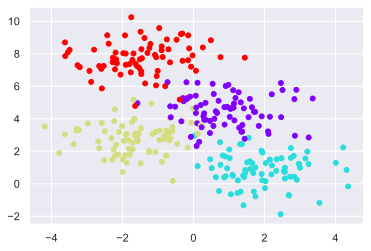

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow');

We fit the a decision tree into our data set by simply calling `.fit(-,-)`.

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

We define a helper function. (Don't sweat the details.)

In [9]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


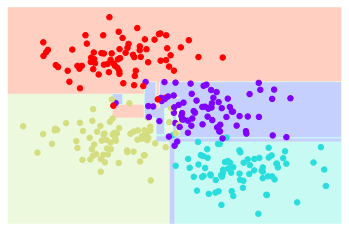

In [13]:
visualize_classifier(DecisionTreeClassifier(max_depth=20), X, y)

__Problem 0__. Would the red region in the middle and violet strip and blue strips generalize to new data outside the training set? That is, is this an intrinsic property of the data outside our model? 

__Problem 1__. What parameter would you adjust to decrease having such regions? Plot the resulting figure for a good parameter value.

## Ensembles of Decision Trees

To counteract overfitting of a decision tree, an ensemble of decision trees is used. Averaging the result smooths out possible effects of overfitting, so that we get a more balanced result -- this technique is called __bagging__. An ensemble of _randomized_ decision trees is known as a __random forest__.

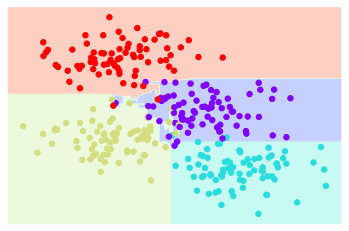

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, 
                        n_estimators=100, 
                        max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

From the docs:

> A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

__Problem 2__. Consider the line of code
`bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)`. What is the meaning of the three parameters `n_estimators=100`, `max_samples=0.8`, and `random_state=1`?

In practice, it is more effective to have randomization of  the splits automatically. This is done auomatically in the `RandomForestClassifier`:


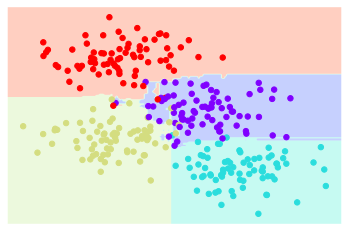

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

## Random Forest Regression

Random Forests can also be used for regression problems. That is, prediction with continuous data. 

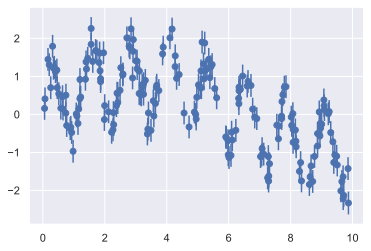

In [20]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise # superimpose the signals

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In the following code, `.fit` accepts training data that is 2-dimensional (table). Hence we need to reshape `x`.

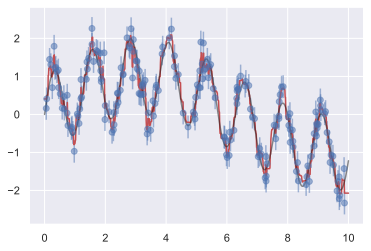

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y) # x[:, None] is just x.reshape(200, 1)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

__Problem 3__. What is the significance of 200 in `forest = RandomForestRegressor(200)`? As this number increases, does the predictive power of the random forest decrease or increase?

__Problem 4__. What is the mean-squared error in training?

__Problem 5__. Since the splitting of the tree is randomized, we would get different results even with the same training set. How would we make the behavior of the classifier reproducible?

__Problem 6__. For a larger data set should we include more or less trees in the random forest?

## Feature importance

Random forests and decision trees have the `feature_importances_` attribute. The higher the value, the more important the feature in classifying the labels. Here, we have only one feature so that the feature importance is 1.

In [44]:
forest.feature_importances_ 

array([1.])

## Rererence

Wnxr InaqreCynf, Clguba Qngn Fpvrapr Unaqobbx. 2016. The text is released under the CC-BY-NC-ND license, and code is released under the MIT license.